In [1]:
library(tidyverse)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [2]:
url <- url <- "https://raw.githubusercontent.com/Acha220/DSCI_Project_Proposal/main/pulsar_data_train.csv"
pulsar <- read_csv(url)

Parsed with column specification:
cols(
  `Mean of the integrated profile` = col_double(),
  `Standard deviation of the integrated profile` = col_double(),
  `Excess kurtosis of the integrated profile` = col_double(),
  `Skewness of the integrated profile` = col_double(),
  `Mean of the DM-SNR curve` = col_double(),
  `Standard deviation of the DM-SNR curve` = col_double(),
  `Excess kurtosis of the DM-SNR curve` = col_double(),
  `Skewness of the DM-SNR curve` = col_double(),
  target_class = col_double()
)



In [3]:
head(pulsar)

Mean of the integrated profile Standard deviation of the integrated profile
1 121.15625                      48.37297                                    
2  76.96875                      36.17556                                    
3 130.58594                      53.22953                                    
4 156.39844                      48.86594                                    
5  84.80469                      36.11766                                    
6 121.00781                      47.17694                                    
  Excess kurtosis of the integrated profile Skewness of the integrated profile
1  0.3754847                                -0.01316549                       
2  0.7128979                                 3.38871856                       
3  0.1334083                                -0.29724164                       
4 -0.2159886                                -0.17129365                       
5  0.8250128                                 3.27412537                       
6  0.2297081                                 0.09133623                       
  Mean of the DM-SNR curve Standard deviation of the DM-SNR curve
1  3.168896                18.39937                              
2  2.399666                17.57100                              
3  2.743311                22.36255                              
4 17.471572                      NA                              
5  2.790134                20.61801                              
6  2.036789                      NA                              
  Excess kurtosis of the DM-SNR curve Skewness of the DM-SNR curve target_class
1 7.449874                             65.159298                   0           
2 9.414652                            102.722975                   0           
3 8.508364                             74.031324                   0           
4 2.958066                              7.197842                   0           
5 8.405008                             76.291128                   0           
6 9.546051                            112.131721                   0

In [4]:
colnames(pulsar) <- c("mean_profile", "sd_profile", "kurtosis_profile", "skew_profile", "mean_dmsnr", "sd_dmsnr", "kurtosis_dmsnr", "skew_dmsnr", "target_class")

In [5]:
pulsar <- pulsar %>%
mutate(target_class = as_factor(target_class))

In [6]:
pulsar_split <- initial_split(pulsar, prop = 0.75, strata = target_class)
pulsar_training <- training(pulsar_split)
pulsar_testing <- testing(pulsar_split)

In [7]:
glimpse(pulsar_training)

Rows: 9,396
Columns: 9
$ mean_profile     <dbl> 76.96875, 156.39844, 84.80469, 121.00781, 109.40625,…
$ sd_profile       <dbl> 36.17556, 48.86594, 36.11766, 47.17694, 55.91252, 40…
$ kurtosis_profile <dbl> 0.71289786, -0.21598860, 0.82501279, 0.22970813, 0.5…
$ skew_profile     <dbl> 3.38871856, -0.17129365, 3.27412537, 0.09133623, 0.0…
$ mean_dmsnr       <dbl> 2.3996656, 17.4715719, 2.7901338, 2.0367893, 2.79765…
$ sd_dmsnr         <dbl> 17.570997, NA, 20.618009, NA, 19.496527, 18.217741, …
$ kurtosis_dmsnr   <dbl> 9.414652, 2.958066, 8.405008, 9.546051, 9.443282, 7.…
$ skew_dmsnr       <dbl> 102.722975, 7.197842, 76.291128, 112.131721, 97.3745…
$ target_class     <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…


In [8]:
pulsar_mean <- select(pulsar_training, target_class, mean_profile, mean_dmsnr)
pulsar_mean

target_class mean_profile mean_dmsnr 
1    0             76.96875     2.3996656 
2    0            156.39844    17.4715719 
3    0             84.80469     2.7901338 
4    0            121.00781     2.0367893 
5    0            109.40625     2.7976589 
6    0             95.00781     2.7700669 
7    0            109.15625     4.5785953 
8    0            130.08594     5.0501672 
9    0             96.93750     1.9715719 
10   0            146.69531     2.8854515 
11   0            128.73438     5.3076923 
12   0            102.36719     1.9188963 
13   0            125.60938     2.2466555 
14   0            104.56250     0.4732441 
15   0            115.78125     3.5652174 
16   0            133.12500    31.5535117 
17   0            125.14844     3.2182274 
18   0             83.93750     1.7474916 
19   0            135.13281     5.2299331 
20   0            111.71094     2.1396321 
21   0            127.32812     3.9556856 
22   0            101.91406     9.3720736 
23   0            108.74219    17.3795987 
24   0            102.23438     4.7508361 
25   0             98.57031     1.8152174 
26   0            108.75781     3.4289298 
27   0            117.67969     2.7316054 
28   1             43.50000    39.5852843 
29   0            122.09375     1.7968227 
30   0            121.55469     3.2190635 
⋮    ⋮            ⋮            ⋮          
9367 0             81.45312      6.8051839
9368 0             96.71875      7.2516722
9369 0            110.14844      2.2090301
9370 0            113.14062      2.3687291
9371 0             99.67188      3.0117057
9372 0            101.85938      3.2424749
9373 0            120.85938      3.0301003
9374 0             82.28125      6.2182274
9375 0            120.55469      1.0802676
9376 0            132.50781    188.0794314
9377 0            117.25781      6.4272575
9378 0            128.23438     16.4397993
9379 0            132.33594      4.7366221
9380 0             85.01562      3.2625418
9381 0            106.52344      4.6914716
9382 0            117.67188      2.6003344
9383 0            104.42969      3.8085284
9384 0            128.70312      2.7867893
9385 0            128.51562      9.2056856
9386 0            127.60938      0.5275920
9387 0            116.69531      1.9188963
9388 1             62.16406     16.8461539
9389 0            113.09375      4.6789298
9390 0            121.17969      4.2307692
9391 0            100.65625     23.3143813
9392 1             90.57031    152.4197324
9393 0            124.82812      2.3428094
9394 0            124.31250      7.1864548
9395 0            116.03125      0.7851171
9396 0            135.66406      3.8595318

In [9]:
pulsar_recipe <- recipe(target_class ~., data = pulsar_mean) %>% 
    step_scale(all_predictors()) %>% 
    step_center(all_predictors()) 
pulsar_recipe

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor          2

Operations:

Scaling for all_predictors()
Centering for all_predictors()

In [10]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>% #weight_func = rectangular allows each neighbor to have 1 vote
    set_engine("kknn") %>%
    set_mode("classification")
knn_spec #Creating a model specification for K nearest neighbors

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [11]:
k_vals <- tibble(neighbors = seq(from = 1, to = 50))

In [12]:
pulsar_vfold <- vfold_cv(pulsar_mean, v = 5, strata = target_class)
pulsar_vfold #5 or 10 usually. Higher fold = lower standard error = more computation = more time to run computer

splits                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [13]:
knn_results <- workflow() %>% 
add_recipe(pulsar_recipe) %>% 
add_model(knn_spec) %>% 
tune_grid(resamples = pulsar_vfold, grid = k_vals) %>% 
collect_metrics()
knn_results

neighbors .metric  .estimator mean      n std_err      .config
1    1        accuracy binary     0.9570027 5 0.0020584073 Model01
2    1        roc_auc  binary     0.8689701 5 0.0070679072 Model01
3    2        accuracy binary     0.9570027 5 0.0020584073 Model02
4    2        roc_auc  binary     0.9054936 5 0.0062679894 Model02
5    3        accuracy binary     0.9683909 5 0.0006846248 Model03
6    3        roc_auc  binary     0.9185965 5 0.0048940152 Model03
7    4        accuracy binary     0.9683909 5 0.0006846248 Model04
8    4        roc_auc  binary     0.9250357 5 0.0057983010 Model04
9    5        accuracy binary     0.9705194 5 0.0007635230 Model05
10   5        roc_auc  binary     0.9269412 5 0.0060054896 Model05
11   6        accuracy binary     0.9705194 5 0.0007635230 Model06
12   6        roc_auc  binary     0.9310546 5 0.0050135436 Model06
13   7        accuracy binary     0.9711582 5 0.0009413008 Model07
14   7        roc_auc  binary     0.9325186 5 0.0053052071 Model07
15   8        accuracy binary     0.9711582 5 0.0009413008 Model08
16   8        roc_auc  binary     0.9365279 5 0.0057669530 Model08
17   9        accuracy binary     0.9723288 5 0.0006927346 Model09
18   9        roc_auc  binary     0.9390757 5 0.0055215667 Model09
19  10        accuracy binary     0.9723288 5 0.0006927346 Model10
20  10        roc_auc  binary     0.9402649 5 0.0057509420 Model10
21  11        accuracy binary     0.9720094 5 0.0004923944 Model11
22  11        roc_auc  binary     0.9411130 5 0.0057778723 Model11
23  12        accuracy binary     0.9720094 5 0.0004923944 Model12
24  12        roc_auc  binary     0.9430901 5 0.0066616405 Model12
25  13        accuracy binary     0.9716901 5 0.0006155428 Model13
26  13        roc_auc  binary     0.9465784 5 0.0057082110 Model13
27  14        accuracy binary     0.9716901 5 0.0006155428 Model14
28  14        roc_auc  binary     0.9479658 5 0.0058469561 Model14
29  15        accuracy binary     0.9713710 5 0.0008291160 Model15
30  15        roc_auc  binary     0.9494200 5 0.0048803138 Model15
⋮   ⋮         ⋮        ⋮          ⋮         ⋮ ⋮            ⋮      
71  36        accuracy binary     0.9723289 5 0.001280030  Model36
72  36        roc_auc  binary     0.9558637 5 0.005323203  Model36
73  37        accuracy binary     0.9724353 5 0.001205111  Model37
74  37        roc_auc  binary     0.9556979 5 0.005419120  Model37
75  38        accuracy binary     0.9724353 5 0.001205111  Model38
76  38        roc_auc  binary     0.9555635 5 0.005493508  Model38
77  39        accuracy binary     0.9724353 5 0.001205111  Model39
78  39        roc_auc  binary     0.9552993 5 0.005500201  Model39
79  40        accuracy binary     0.9724353 5 0.001205111  Model40
80  40        roc_auc  binary     0.9556831 5 0.005418169  Model40
81  41        accuracy binary     0.9719032 5 0.001328077  Model41
82  41        roc_auc  binary     0.9562480 5 0.005116225  Model41
83  42        accuracy binary     0.9719032 5 0.001328077  Model42
84  42        roc_auc  binary     0.9558957 5 0.005139719  Model42
85  43        accuracy binary     0.9724352 5 0.001182116  Model43
86  43        roc_auc  binary     0.9561118 5 0.004895424  Model43
87  44        accuracy binary     0.9724352 5 0.001182116  Model44
88  44        roc_auc  binary     0.9562180 5 0.004895932  Model44
89  45        accuracy binary     0.9721158 5 0.001148653  Model45
90  45        roc_auc  binary     0.9559166 5 0.004925079  Model45
91  46        accuracy binary     0.9721158 5 0.001148653  Model46
92  46        roc_auc  binary     0.9562418 5 0.004860367  Model46
93  47        accuracy binary     0.9721158 5 0.001288132  Model47
94  47        roc_auc  binary     0.9560715 5 0.004916483  Model47
95  48        accuracy binary     0.9721158 5 0.001288132  Model48
96  48        roc_auc  binary     0.9565475 5 0.005270522  Model48
97  49        accuracy binary     0.9721159 5 0.001135895  Model49
98  49        roc_auc  binary     0.9573647 5 0.004

In [14]:
accuracies <- knn_results %>% 
filter(.metric == "accuracy")
accuracies

neighbors .metric  .estimator mean      n std_err      .config
1   1        accuracy binary     0.9570027 5 0.0020584073 Model01
2   2        accuracy binary     0.9570027 5 0.0020584073 Model02
3   3        accuracy binary     0.9683909 5 0.0006846248 Model03
4   4        accuracy binary     0.9683909 5 0.0006846248 Model04
5   5        accuracy binary     0.9705194 5 0.0007635230 Model05
6   6        accuracy binary     0.9705194 5 0.0007635230 Model06
7   7        accuracy binary     0.9711582 5 0.0009413008 Model07
8   8        accuracy binary     0.9711582 5 0.0009413008 Model08
9   9        accuracy binary     0.9723288 5 0.0006927346 Model09
10 10        accuracy binary     0.9723288 5 0.0006927346 Model10
11 11        accuracy binary     0.9720094 5 0.0004923944 Model11
12 12        accuracy binary     0.9720094 5 0.0004923944 Model12
13 13        accuracy binary     0.9716901 5 0.0006155428 Model13
14 14        accuracy binary     0.9716901 5 0.0006155428 Model14
15 15        accuracy binary     0.9713710 5 0.0008291160 Model15
16 16        accuracy binary     0.9713710 5 0.0008291160 Model16
17 17        accuracy binary     0.9716904 5 0.0011321228 Model17
18 18        accuracy binary     0.9716904 5 0.0011321228 Model18
19 19        accuracy binary     0.9710518 5 0.0011950385 Model19
20 20        accuracy binary     0.9710518 5 0.0011950385 Model20
21 21        accuracy binary     0.9711582 5 0.0012280952 Model21
22 22        accuracy binary     0.9711582 5 0.0012280952 Model22
23 23        accuracy binary     0.9726481 5 0.0012193610 Model23
24 24        accuracy binary     0.9726481 5 0.0012193610 Model24
25 25        accuracy binary     0.9723289 5 0.0012910466 Model25
26 26        accuracy binary     0.9723289 5 0.0012910466 Model26
27 27        accuracy binary     0.9721159 5 0.0013092966 Model27
28 28        accuracy binary     0.9721159 5 0.0013092966 Model28
29 29        accuracy binary     0.9723288 5 0.0013348792 Model29
30 30        accuracy binary     0.9723288 5 0.0013348792 Model30
31 31        accuracy binary     0.9722225 5 0.0013595011 Model31
32 32        accuracy binary     0.9722225 5 0.0013595011 Model32
33 33        accuracy binary     0.9726481 5 0.0011719843 Model33
34 34        accuracy binary     0.9726481 5 0.0011719843 Model34
35 35        accuracy binary     0.9723289 5 0.0012800304 Model35
36 36        accuracy binary     0.9723289 5 0.0012800304 Model36
37 37        accuracy binary     0.9724353 5 0.0012051112 Model37
38 38        accuracy binary     0.9724353 5 0.0012051112 Model38
39 39        accuracy binary     0.9724353 5 0.0012051112 Model39
40 40        accuracy binary     0.9724353 5 0.0012051112 Model40
41 41        accuracy binary     0.9719032 5 0.0013280769 Model41
42 42        accuracy binary     0.9719032 5 0.0013280769 Model42
43 43        accuracy binary     0.9724352 5 0.0011821163 Model43
44 44        accuracy binary     0.9724352 5 0.0011821163 Model44
45 45        accuracy binary     0.9721158 5 0.0011486529 Model45
46 46        accuracy binary     0.9721158 5 0.0011486529 Model46
47 47        accuracy binary     0.9721158 5 0.0012881324 Model47
48 48        accuracy binary     0.9721158 5 0.0012881324 Model48
49 49        accuracy binary     0.9721159 5 0.0011358952 Model49
50 50        accuracy binary     0.9721159 5 0.0011358952 Model50

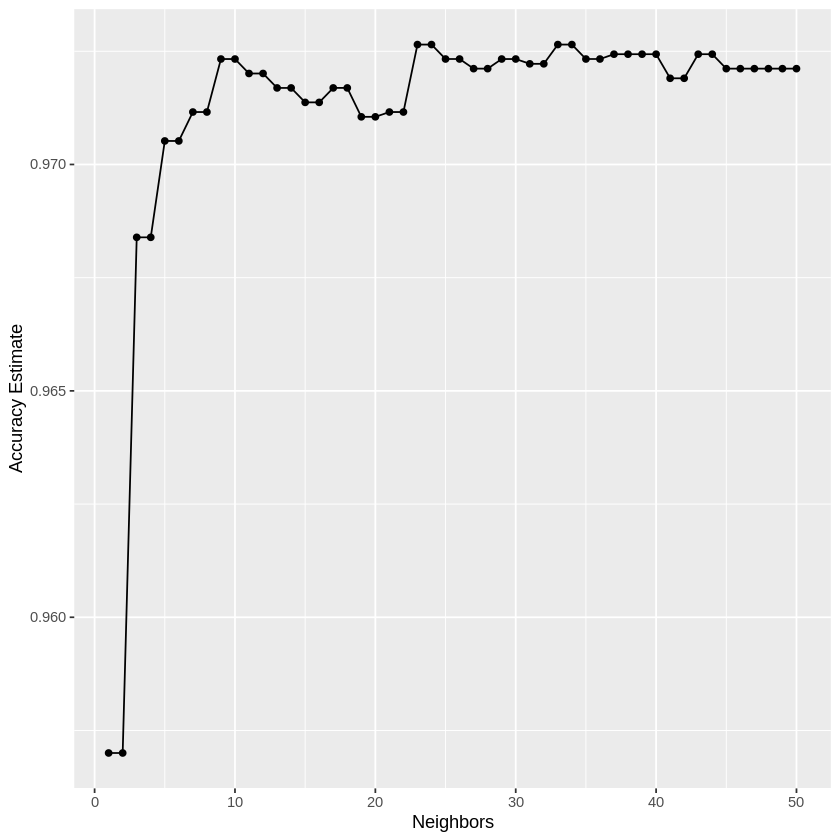

In [15]:
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
geom_point() +
geom_line() + 
labs(x = "Neighbors", y = "Accuracy Estimate")
accuracy_vs_k